##EDA AND FEATURE ENGINEERING OF GOOGLE PLAYSTORE DATASET


1.PROBLEM STATEMENT : -> TODAY 1.85 MILLION DIFFERENT APPS ARE AVAILABLE FOR USERS TO DOWNLOAD.ANDROID USERS HAVE EVEN MORE FROM WHICH TO CHOOSE WITH 2.56 MILLION AVAILABLE THROUGH THE GOOGLE PLAY STORE.
THESE APPS HAVE COME TO PLAY A HUGE ROLE IN THE WAY WE LIVE OUR LIVES TODAY. OUR OBJECTIVE IS TO FIND THE MOST POPULAR CATEGORY , FIND THE APP WITH THE LARGEST NUMBER OF INSTALLS. THE APP WITH THE LARGEST SIZE ETC

2.DATA COLLECTION

THE DATA CONSISTS OF 13 COLUMN AND 10841 ROWS


STEPS WE ARE GOING TO FOLLOW

1. DATA CLEANING
2. EDA
3. FEATURE ENGINEERING

In [1]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("/content/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# summary of dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
## missing values
df.isnull().sum()


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [8]:
#INSIGHTS AND OBSERVATIONS

#>_ THE DATA SET HAS MISSING VALUES

In [9]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [10]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [11]:
# checking how many values in column is in numbers.
df['Reviews'].str.isnumeric().sum()
# but we have value count = 10840 (df.shape)

np.int64(10840)

In [12]:
#df['Reviews'].astype(int) # here is problem :->ValueError: invalid literal for int() with base 10: '3.0M'


In [13]:
df[~df['Reviews'].str.isnumeric()] # we got value that has problem


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df_copy= df.copy()

In [15]:
# the row/field has been deleted
df_copy = df_copy.drop(df_copy.index[10472])

In [16]:
# covert data type of reviews to int

df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [18]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [19]:
df_copy['Size'].isnull().sum()

np.int64(0)

WE ARE GOING TO CONVERT ALL M UNITS TO K OF SIZE LIKE 19M = 19000000 TO 19000K(K = 1000). JUST TO MAKE IT IN ONE UNIT AS MAJORITY IS K.

In [20]:
#CONVERTING M TO K UNITS
df_copy['Size'] = df_copy['Size'].str.replace('M','000')

In [21]:
df_copy['Size'] = df_copy['Size'].str.replace('k','')

In [22]:
df_copy['Size']

,Size
0,19000
1,14000
2,8.7000
3,25000
4,2.8000
...,...
10836,53000
10837,3.6000
10838,9.5000
10839,Varies with device


In [23]:
df_copy['Size'] = df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size'] = df_copy['Size'].astype(float)

In [24]:
df_copy['Size']

,Size
0,19000.0
1,14000.0
2,8.7
3,25000.0
4,2.8
...,...
10836,53000.0
10837,3.6
10838,9.5
10839,NaN


In [25]:
df_copy['Installs'].unique() ##->error Free

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [26]:
df_copy['Price'].unique() #error _>'Everyone

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [27]:
# replacing the error value with cleaned data
char_to_remove = ['+',',','$']
columns_to_clean = ['Installs','Price']
for items in char_to_remove:
  for cols in columns_to_clean:
    df_copy[cols] = df_copy[cols].str.replace(items,'')

In [28]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [29]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [30]:
# coverting into numbers

df_copy['Installs'] = df_copy['Installs'].astype('int')
df_copy['Price'] = df_copy['Price'].astype('float')

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [32]:
# modifying last update
# we really need to convert it into date time
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [33]:
df_copy['Last_Updated'] =pd.to_datetime(df_copy['Last Updated'])
df_copy['Day'] =  df_copy['Last_Updated'].dt.day
df_copy['Month'] =  df_copy['Last_Updated'].dt.month
df_copy['Year'] =  df_copy['Last_Updated'].dt.year

In [34]:
df_copy = df_copy.drop('Last Updated',axis=1)

In [35]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018-01-07,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018-01-15,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,2018-08-01,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,2018-06-08,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2018-06-20,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,2017-07-25,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,1.0,4.1 and up,2018-07-06,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,2017-01-20,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,2015-01-19,19,1,2015


In [36]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018-01-07,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018-01-15,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,2018-08-01,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,2018-06-08,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2018-06-20,20,6,2018


In [37]:
df_copy.to_csv('data/google_cleaned.csv')

NOW DATA SET IS READY FOR EDA (EXPLORATORY DATA ANALYSIS )

In [38]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018-01-07,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018-01-15,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,2018-08-01,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,2018-06-08,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2018-06-20,20,6,2018


In [39]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

#observation

# the dataset has duplicate records

In [40]:
df_copy.drop_duplicates(subset = ['App'],keep = 'first')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018-01-07,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018-01-15,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,2018-08-01,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,2018-06-08,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2018-06-20,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,2017-07-25,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,1.0,4.1 and up,2018-07-06,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,2017-01-20,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,2015-01-19,19,1,2015


Explore data

In [42]:
numerical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']
# if equals toO then consider it to be a categoricl variable else numerical variable

print('we have {} numerical feature : {}'.format(len(numerical_feature),numerical_feature))
print('we have {} categorical feature : {}'.format(len(categorical_feature),categorical_feature))

we have 9 numerical feature : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last_Updated', 'Day', 'Month', 'Year']
we have 7 categorical feature : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [43]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Current Ver     10832 non-null  object        
 11  Android Ver     10838 non-null  object        
 12  Last_Updated    10840 non-null  datetime64[ns]
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [44]:
# proportion of count data on categorical columns:
for col in categorical_feature:
  print(df_copy[col].value_counts(normalize = True)*100) #normalize -> instead of numers it will give in proprtion
  print('-------------------------------------------------')


App
ROBLOX                                               0.083026
CBS Sports App - Scores, News, Stats & Watch Live    0.073801
Duolingo: Learn Languages Free                       0.064576
ESPN                                                 0.064576
8 Ball Pool                                          0.064576
                                                       ...   
FieldBi FR Offline                                   0.009225
Golden Dictionary (FR-AR)                            0.009225
FR: My Secret Pets!                                  0.009225
Learn To Draw Kawaii Characters                      0.009225
3D Color Pixel by Number - Sandbox Art Coloring      0.009225
Name: proportion, Length: 9659, dtype: float64
-------------------------------------------------
Category
FAMILY                 18.191882
GAME                   10.553506
TOOLS                   7.776753
MEDICAL                 4.271218
BUSINESS                4.243542
PRODUCTIVITY            3.911439
PERSONALIZ

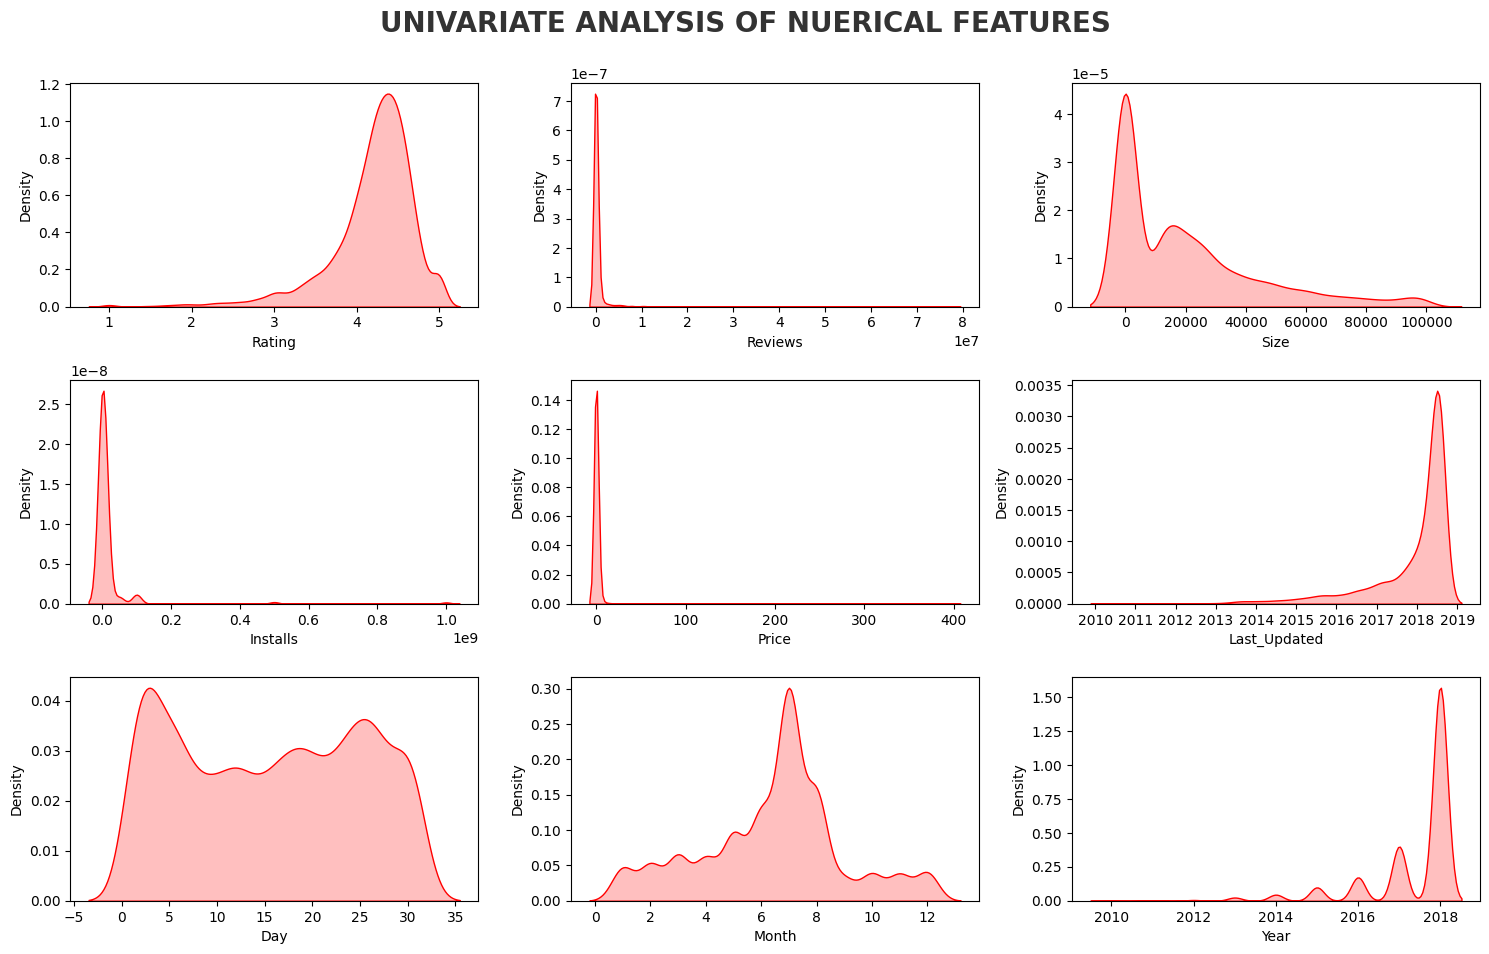

In [45]:
# proportion of count data on numerical columns

plt.figure(figsize = (15,15))
plt.suptitle('UNIVARIATE ANALYSIS OF NUERICAL FEATURES',fontsize = 20,fontweight = 'bold',alpha = 0.8,y = 1.)

for i in range(0,len(numerical_feature)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x = df_copy[numerical_feature[i]],shade = True,color = 'red')
  plt.xlabel(numerical_feature[i])
  plt.tight_layout()

##observations
# rating and year is left skewed while Review,Size,Installs and price are right skewed

## outliers are present

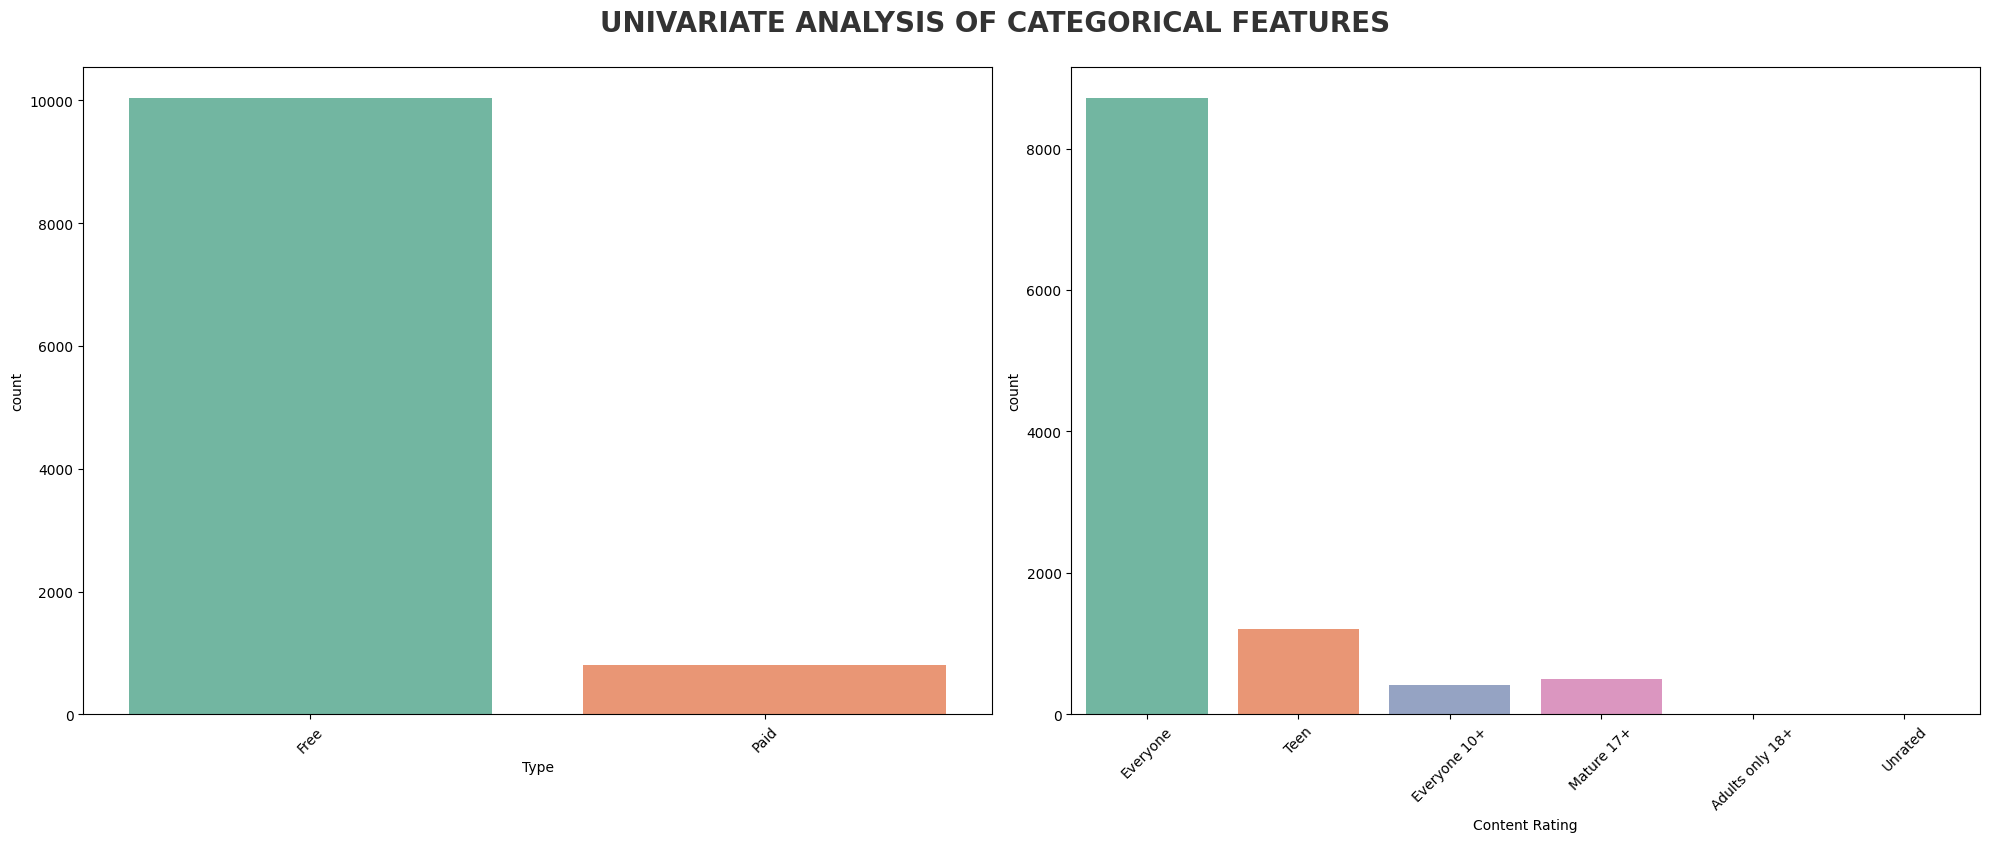

In [48]:
plt.figure(figsize = (20,15))
plt.suptitle('UNIVARIATE ANALYSIS OF CATEGORICAL FEATURES',fontsize = 20,fontweight = 'bold',alpha = 0.8, y= 1.)
categorical= ['Type','Content Rating']
for i in range(0,len(categorical)):
  plt.subplot(2,2,i+1)
  sns.countplot(x = df_copy[categorical[i]],palette = "Set2")
  plt.xlabel(categorical[i])
  plt.xticks(rotation = 45)
  plt.tight_layout()

##Left Plot: Type of App (Free vs Paid)
Free apps dominate the market with over 10,000 entries.
Paid apps are significantly fewer, with under 1,000 entries.
✅ Conclusion: The app market is heavily skewed towards free apps, indicating that most developers prefer offering free apps, possibly monetizing through ads or in-app purchases

##Right Plot: Content Rating
The majority of apps are rated "Everyone", with counts above 8,000.

✅ Conclusion: Most apps are designed for general audiences, making them suitable for a broad user base. Very few apps are targeted exclusively for adults or left unrated, which might reflect store policies or developer preferences.

KPI 1 )## which is the most popluar app category


<Axes: ylabel='count'>

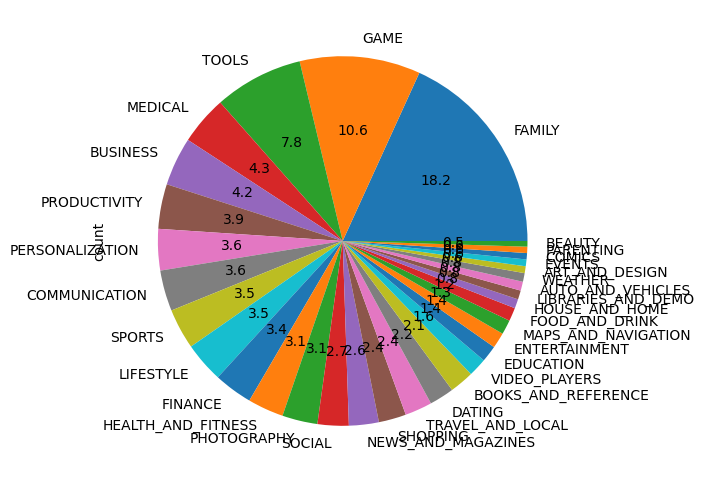

In [63]:
df_copy['Category'].value_counts().plot.pie(figsize = (15,6), autopct='%1.1f')

##observation
1.THERE ARE MORE KINDS OF APPS IN PLAYSTORE WHICH ARE UNDER CATEGORY OF FAMILY,GAMES AND TOOLS

2. BEAUTY,COMICS, ARTS AND WEATHER KIND OF APPS ARE VERY LESS IN PLAYSTORE

## TOP TEN APPP CATEGORY

In [74]:
CATEGORY = pd.DataFrame(df['Category'].value_counts())
CATEGORY.rename(columns = {'Category':'count'},inplace = True)

In [75]:
CATEGORY

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


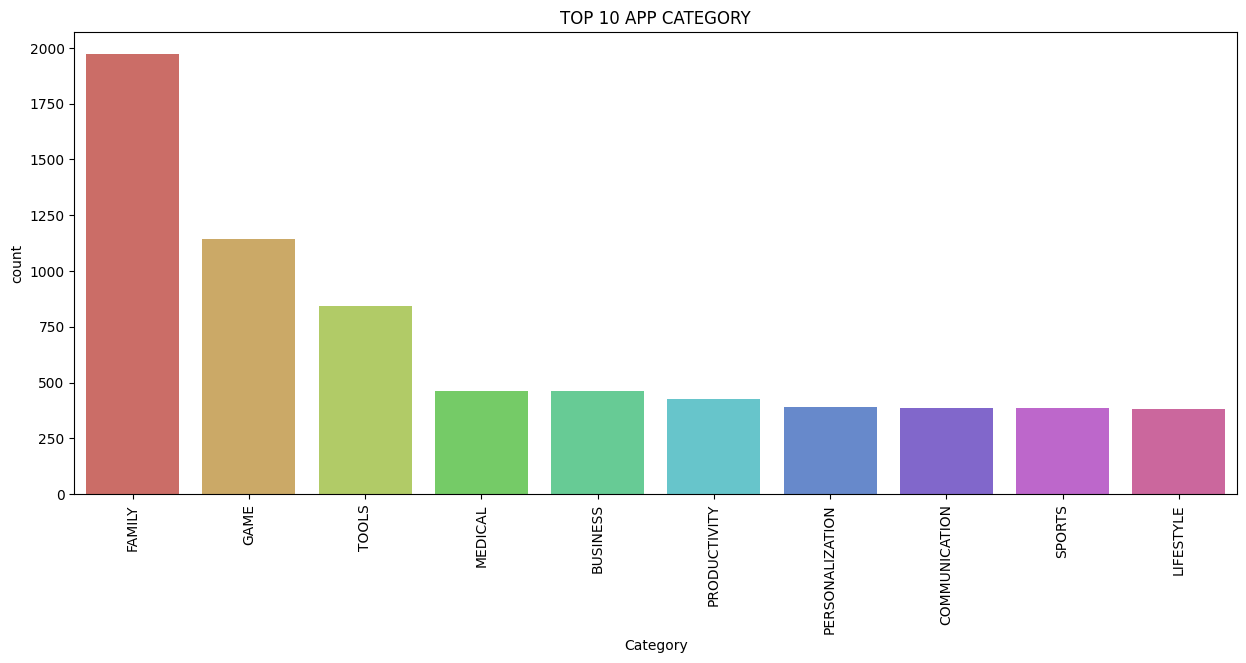

In [76]:
# top en apps
plt.figure(figsize =(15,6))
sns.barplot(x = CATEGORY.index[:10],y = 'count',data = CATEGORY[:10],palette='hls')
plt.title("TOP 10 APP CATEGORY")
plt.xticks(rotation = 90)
plt.show()

Insights: -
1.Family category has the most number of apps with 8% of apps belong to it ,followed by games category which has 11% of the apps
2.least number of apps belong to beauty category with less than 1% of the total apps belong to it

Which category has the largest number of installations

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

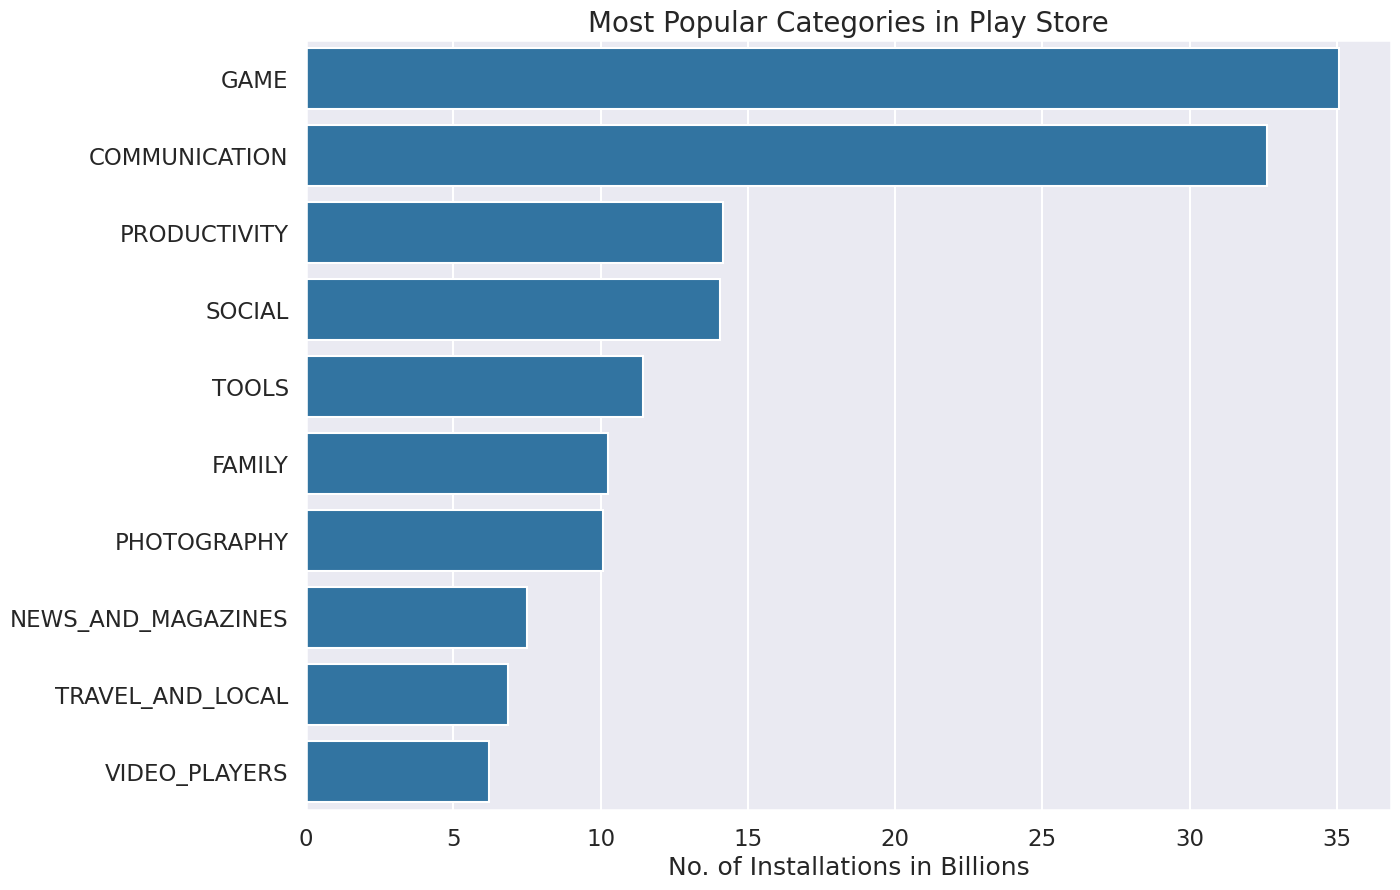

In [77]:
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store


##what are the top 5 most installed apps in each popular category

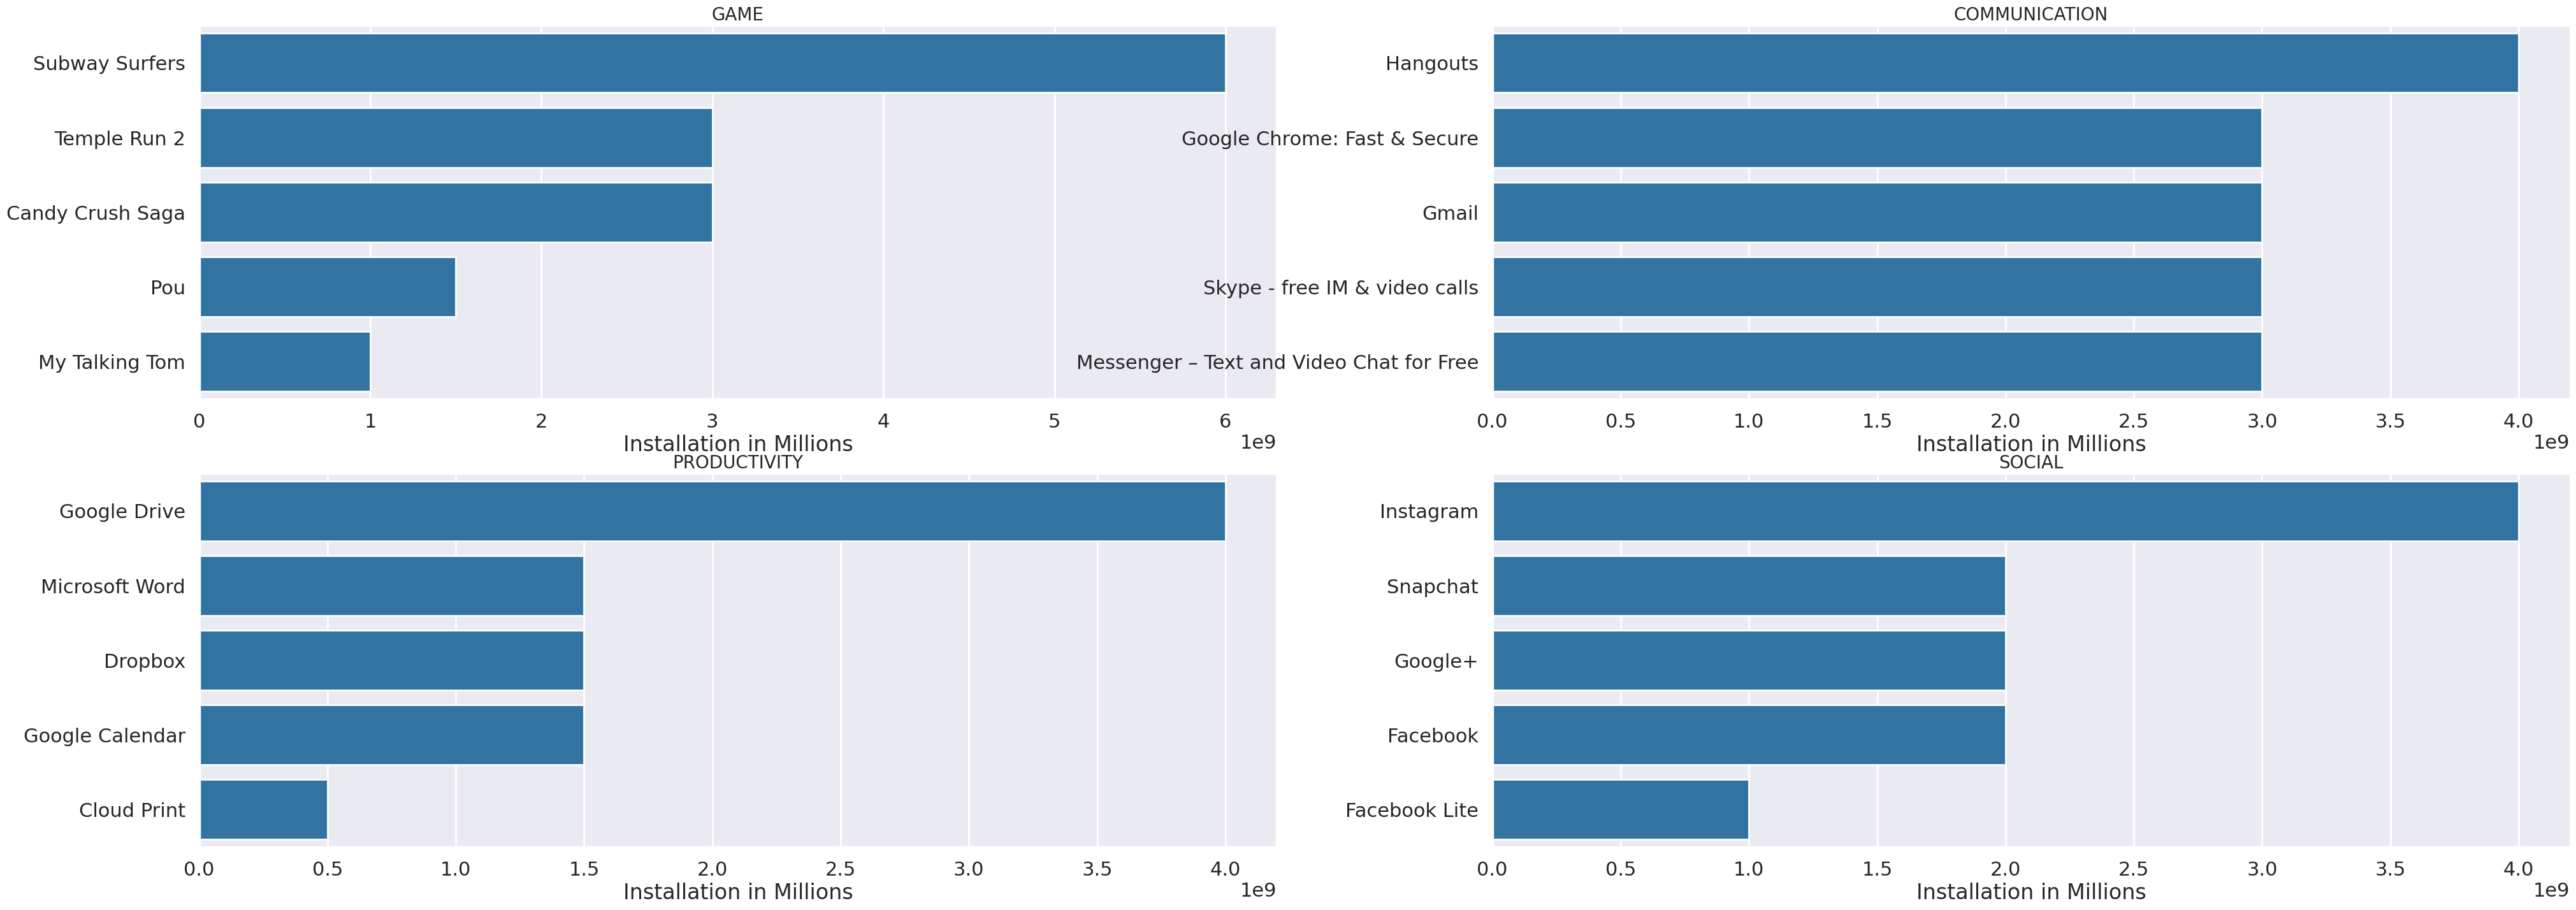

In [89]:
dfa = df_copy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(48,35))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

##how many apps are there on google play store which get 5 ratings?

In [95]:
rating = df_copy.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending =False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head()

Number of 5 rated apps 269


,Category,Installs,App,Rating
738,COMMUNICATION,50,Cb browser,5.0
739,FINANCE,50,CT Checkout,5.0
740,COMMUNICATION,50,BS-Mobile,5.0
741,FINANCE,100,BI APP,5.0
742,FINANCE,100,CF,5.0
